In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_agr = pd.read_csv('agriculture.csv')
df_agr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [3]:
#Checking DataTypes
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [4]:
#Checking the type of values in the dataset
for col in df_agr.columns:
    print(col,'*************\n\n',df_agr[col].unique(),'\n\n',df_agr[col].value_counts(),'\n\n\n\n')

ID *************

 ['F00000001' 'F00000003' 'F00000004' ... 'F00155939' 'F00155942'
 'F00155945'] 

 F00047032    1
F00049568    1
F00067787    1
F00073468    1
F00008160    1
            ..
F00033508    1
F00058861    1
F00037380    1
F00028851    1
F00153766    1
Name: ID, Length: 88858, dtype: int64 




Estimated_Insects_Count *************

 [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097] 

 1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: Estimated_Insects_Count, Length: 71, dtype: int64 




Crop_Type *************

 [1 0] 

 0    63589
1    25269
Name: Crop_Type, dtype: i

In [5]:
df_agr.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

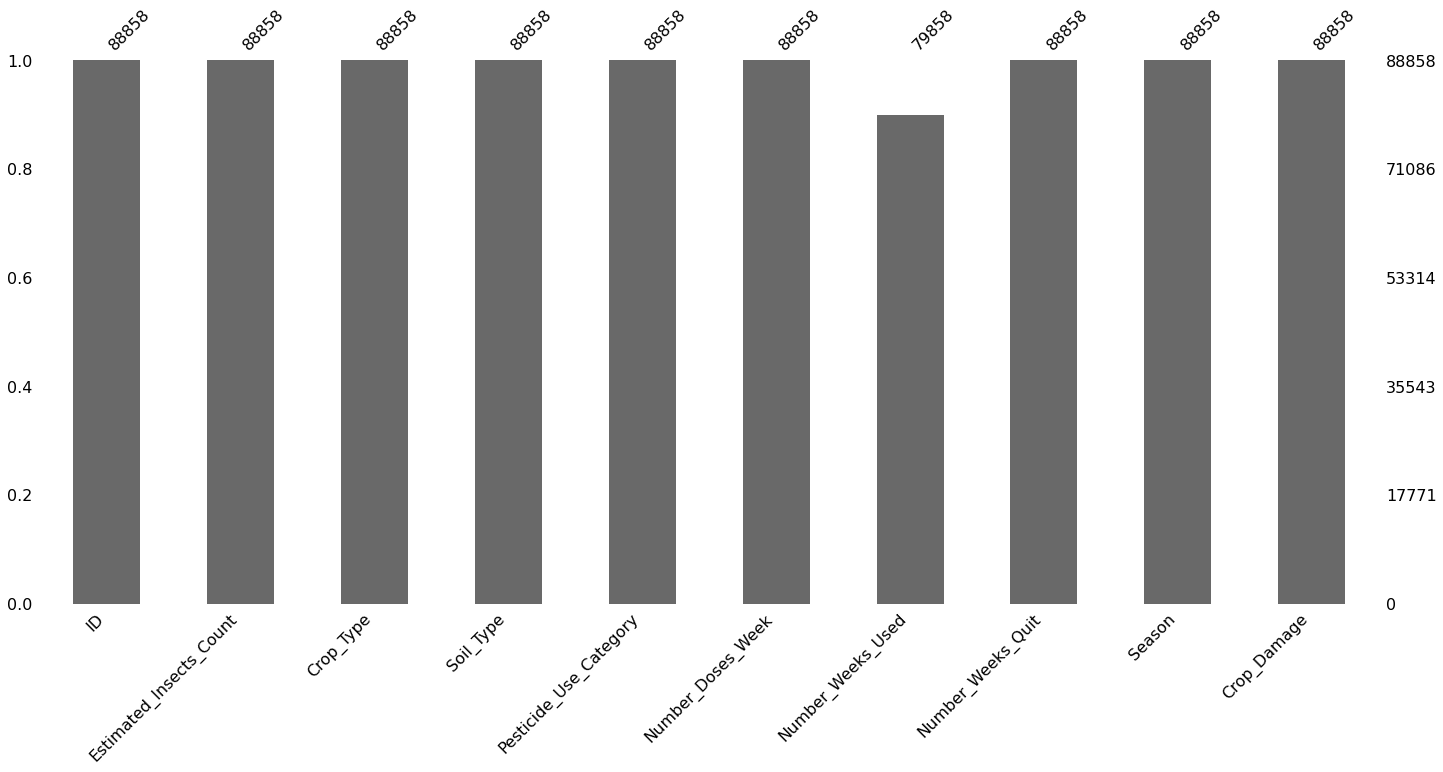

In [6]:
#Missing Values visualization
import missingno as msno
msno.bar(df_agr)

In [7]:
#Removing null values

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_agr['Number_Weeks_Used'] = si.fit_transform(df_agr['Number_Weeks_Used'].to_frame())

In [8]:
#Data Visualization
cat = ['Crop_Damage','Season','Number_Doses_Week','Pesticide_Use_Category','Soil_Type','Crop_Type']
con = ['Number_Week_Quit','Estimated_Insects_Count']

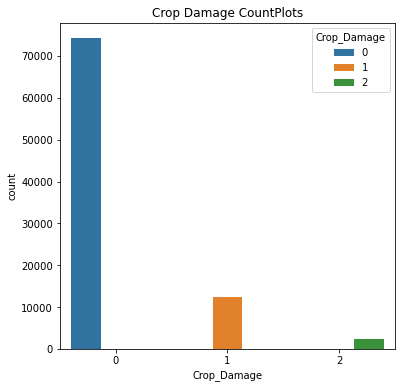

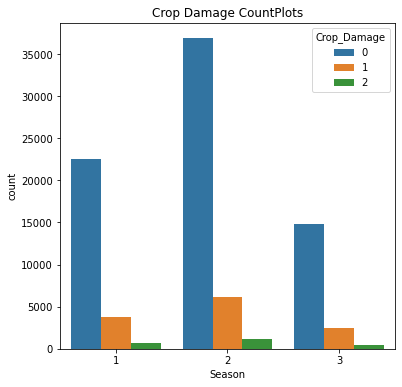

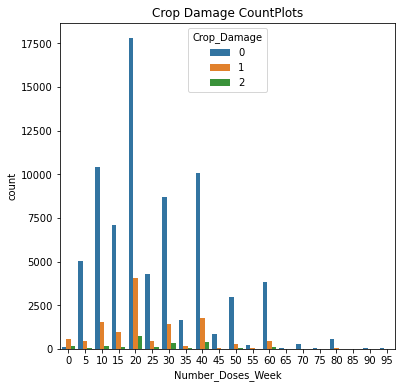

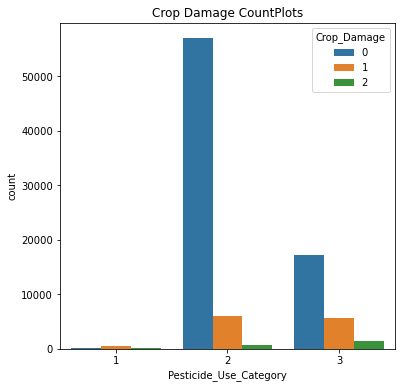

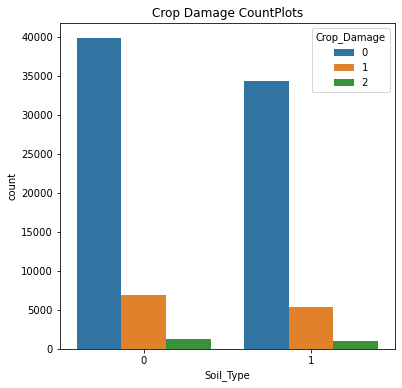

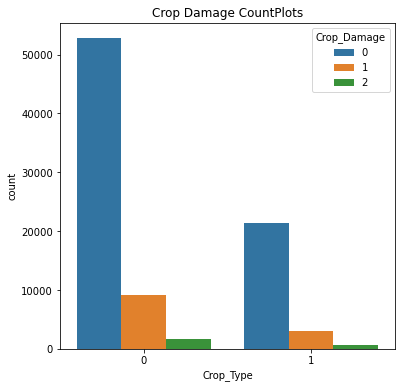

In [9]:
#Removing null values
for col in cat:
    plt.figure(figsize=(6,6))
    sns.countplot(x=col,hue='Crop_Damage',data=df_agr)
    plt.title('Crop Damage CountPlots')
    plt.show()

In [10]:
#Very less crops due to pesticides seeing from the graph
#Highest yield is harvested in season 2
#Highest yield is obtained when 20 doses are given in a week
#Pesticide is giving hoghest yield pesticide 2 is used
#Pesticide is giving highest damaged crops 
#Soil type 2 is ging highest yield
#Crop 0 is high yield crop


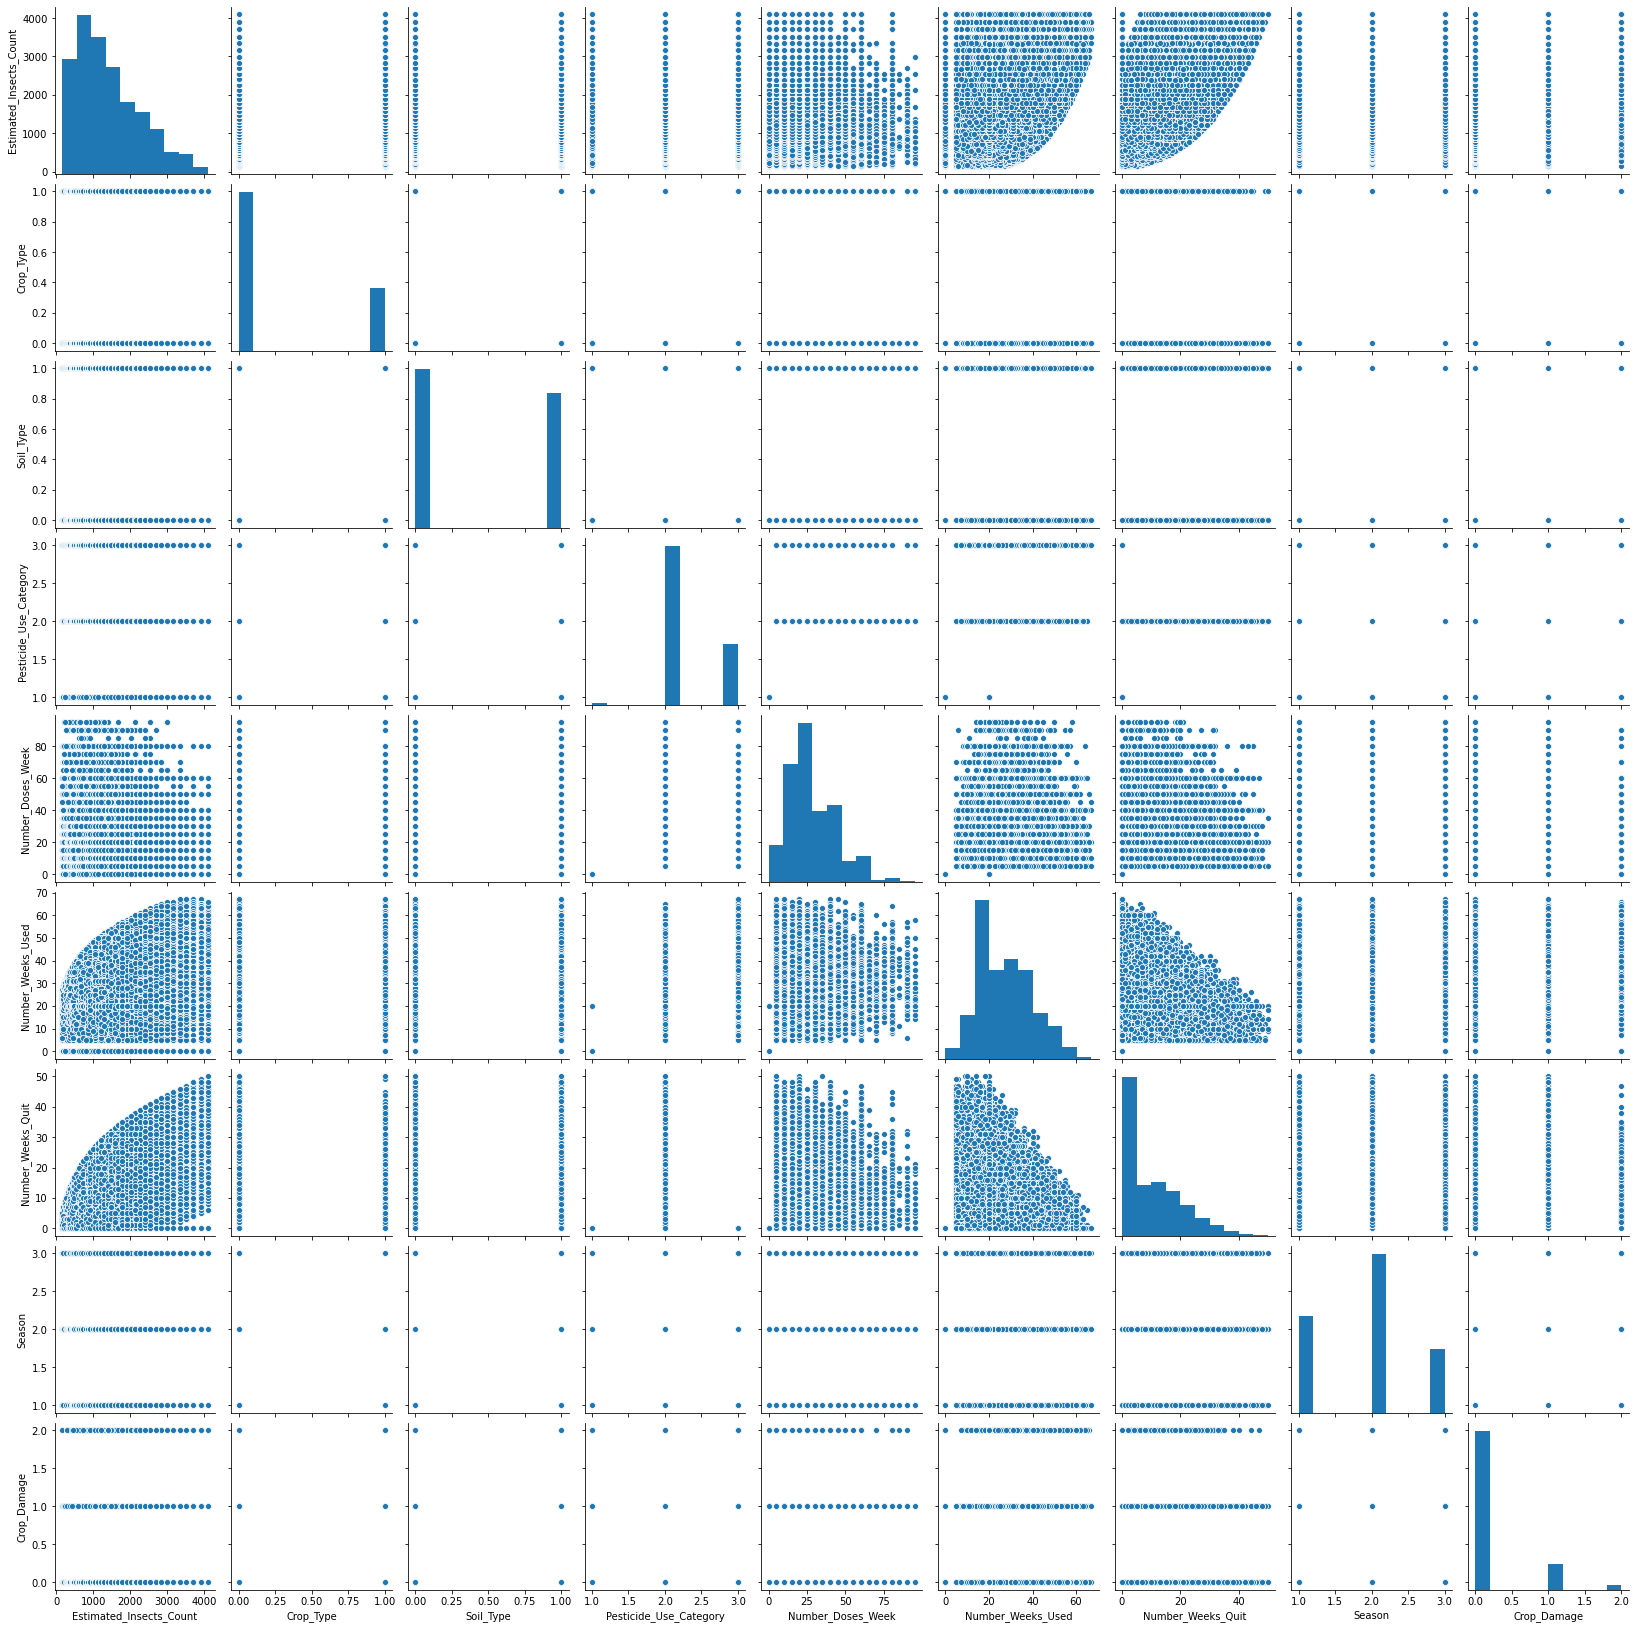

In [11]:
#Pair Plor
sns.pairplot(df_agr)

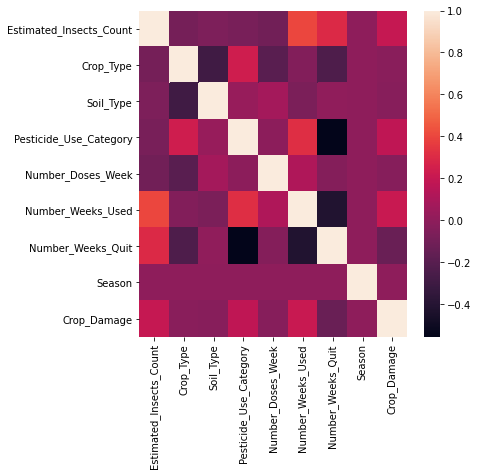

In [12]:
#Correlation
corr = df_agr.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr)
plt.show()

In [13]:
#Checking null values 
df_agr.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [14]:
#ID column can be dropped 
df_agr.drop(columns='ID',inplace=True)

In [15]:
df_agr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [16]:
#Let's remove outliers from the data first
from scipy.stats import zscore
z = np.abs(zscore(df_agr))
z

array([[1.42632444, 1.58634254, 0.92002085, ..., 0.96862918, 1.27896183,
        0.41954474],
       [1.40159074, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       [1.34505657, 1.58634254, 0.92002085, ..., 0.96862918, 0.14692448,
        1.78206788],
       ...,
       [2.49337818, 1.58634254, 0.92002085, ..., 0.16059534, 0.14692448,
        0.41954474],
       [2.7124481 , 1.58634254, 0.92002085, ..., 0.84944697, 1.57281078,
        0.41954474],
       [2.93976258, 1.58634254, 0.92002085, ..., 0.26159957, 1.57281078,
        0.41954474]])

In [17]:
np.where(z>3)

(array([    7,     9,    14, ..., 88741, 88770, 88853], dtype=int64),
 array([8, 8, 8, ..., 8, 4, 6], dtype=int64))

In [18]:
df_new = df_agr[(z<3).all(axis=1)]
df_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88852,3165,1,0,2,60,44.0,15,2,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


In [19]:
#Since outliers are removed so let's remove skewness now 
df_new.skew()

Estimated_Insects_Count    0.802312
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category     0.857490
Number_Doses_Week          0.745649
Number_Weeks_Used          0.430761
Number_Weeks_Quit          0.792407
Season                     0.145248
Crop_Damage                2.065124
dtype: float64

In [20]:
#We will divide the data and then remove skewness as the skewness is present in target columns as well
x = df_new.drop(columns='Crop_Damage')
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
88852,3165,1,0,2,60,44.0,15,2
88854,3516,1,0,2,10,20.0,38,1
88855,3516,1,0,2,15,40.0,8,2
88856,3702,1,0,2,10,25.0,18,3


In [21]:
y = df_new.loc[:,'Crop_Damage']
y

0        0
1        1
2        1
3        1
4        1
        ..
88852    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 84853, dtype: int64

In [22]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for col in x.columns:
    x.loc[:,col] = pt.fit_transform(x.loc[:,col].to_frame())
    
x.skew()

Estimated_Insects_Count   -0.043815
Crop_Type                  0.939630
Soil_Type                  0.165963
Pesticide_Use_Category    -0.111131
Number_Doses_Week         -0.018615
Number_Weeks_Used          0.009386
Number_Weeks_Quit         -0.122284
Season                    -0.042636
dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for col in x.columns:
    x.loc[:,col] = sc.fit_transform(x.loc[:,col].to_frame())

In [24]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.190090,1.574668,-0.920457,-4.988158,-2.954669,-3.165845,-1.289129,-1.327775
1,-2.095763,1.574668,-0.920457,-4.988158,-2.954669,-3.165845,-1.289129,0.209529
2,-1.902430,1.574668,-0.920457,-4.988158,-2.954669,-3.165845,-1.289129,0.209529
3,-1.902430,1.574668,1.086417,-4.988158,-2.954669,-3.165845,-1.289129,0.209529
4,-1.614025,1.574668,-0.920457,-4.988158,-2.954669,-3.165845,-1.289129,0.209529
...,...,...,...,...,...,...,...,...
88852,1.756143,1.574668,-0.920457,-0.505066,1.939463,1.339355,0.798437,0.209529
88854,1.979656,1.574668,-0.920457,-0.505066,-1.121861,-0.583987,1.734998,-1.327775
88855,1.979656,1.574668,-0.920457,-0.505066,-0.627783,1.050212,0.271738,0.209529
88856,2.091874,1.574668,-0.920457,-0.505066,-1.121861,-0.137364,0.967104,1.490195


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state= 44) 

In [27]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
   
    print(m,'\n accuracy score : ',acc_score,'\n\n\n')

LogisticRegression() 
 accuracy score :  0.8597624210427076 



DecisionTreeClassifier() 
 accuracy score :  0.7852833034788347 



KNeighborsClassifier() 
 accuracy score :  0.8545300273404356 



RandomForestClassifier() 
 accuracy score :  0.8537286697463939 





In [28]:
#We can see that gradientboostinclassifier, svc and logistic regression are giving the best scores 
#let's check cross validation score
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in models:
    cvs = cross_val_score(m,x,y,cv=5,scoring='accuracy').mean()
    print('For model : ',m,' accuracy score is ',cvs)

For model :  LogisticRegression()  accuracy score is  0.8592507222362442
For model :  DecisionTreeClassifier()  accuracy score is  0.7871613383807318
For model :  KNeighborsClassifier()  accuracy score is  0.8536292244105834
For model :  RandomForestClassifier()  accuracy score is  0.8522032291419377


In [29]:
#Let's use grid search to enhance the reults of the models
def grid_search(model,para):
    from sklearn.model_selection import GridSearchCV
    grd = GridSearchCV(model,para,cv=5,scoring='accuracy')
    grd.fit(x,y)
    return print('Best parameters for ',model,' are ',grd.best_params_,'for score ',grd.best_score_)

In [30]:
#logisticRegression
lreg = LogisticRegression()
params = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.001,0.01,0.1,1,10,25]
}
grid_search(lreg,params)

Best parameters for  LogisticRegression()  are  {'C': 0.01, 'penalty': 'l2'} for score  0.8593214345647764


In [31]:
#Logistic Regression is giving the best accuracy

import joblib 
joblib.dump(lreg,'Project10_Agriculture.obj')

['Project10_Agriculture.obj']